# Model Evaluation
Model evaluation is the technique which helps us to determine how well our model performance is. we shall use performance metrics to evaluate how our model did.
* considering metric for Binary classification 
# The key classification metrics we need to understand are:
* Accuracy
* Recall
* Precision
* F1-Score
For the purposes of explaining the metrics, let’s imagine a binary classification situation, where we only have two available classes (either yes or no, 1 or 0).

Also in the real world, a single metric won’t tell the complete story!
To understand all of this, let’s bring back the 4 metrics we mentioned and see how they are calculated.
We could organize our predicted values compared to the real values in a confusion matrix. 
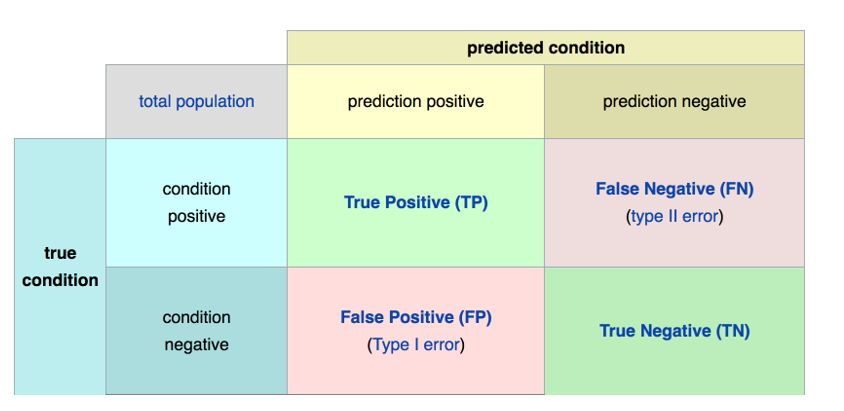

# 1) Acuracy
* Accuracy in classification problems is the number of correct predictions made by the model divided by the total number of predictions.

**Note:**
Accuracy is useful when target classes are well balanced
# 2) Precision
Ability of a classification model to identify only the relevant data points.
* Precision is defined as the number of **true positives** divided by the number of true positives plus the number of false positives.

# 3) Recall

Ability of a model to find all the relevant cases within a dataset. 
* The precise definition of recall is the number of true positives divided by the number of true positives plus the number of false negatives. 

# 4) F1-Score
* In cases where we want to find an optimal blend of precision and recall we can combine the two metrics using what is called the F1 score.

# confusion matrix in details

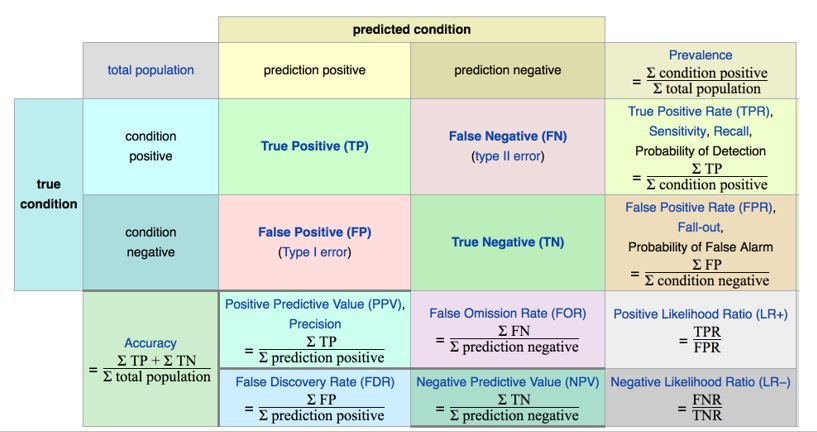
https://enwikipedia.org/wiki/Precision_and_recall

# Illustration with Breast Cancer data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['savefig.dpi'] =300
plt.rcParams['savefig.bbox'] = 'tight'
np.set_printoptions(precision =3, suppress = True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                   data.target, stratify=data.target, random_state=0)

In [7]:
logr =LogisticRegression().fit(X_train, y_train)
y_pred = logr.predict(X_test)

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# importing confusion matrix from sklearn

In [21]:
def plot_confusion_matrix(values, xlabel="predicted labels", ylabel="true labels", xticklabels=None,
                          yticklabels=None, cmap=None, vmin=None, vmax=None, ax=None,
                          fmt="{:.2f}", xtickrotation=45, norm=None):
    """Plot a matrix as heatmap with explicit numbers.
    Parameters
    ----------
    values : ndarray
        Two-dimensional array to visualize.
    xlabel : string, default=""
        Label for the x-axis.
    ylabel : string, default=""
        Label for the y-axis.
    xticklabels : list of string or None, default=None
        Tick labels for the x-axis.
    yticklabels : list of string or None, default=None
        Tick labels for the y-axis
    cmap : string or colormap
        Matpotlib colormap to use.
    vmin : int, float or None
        Minimum clipping value.
    vmax : int, float or None
        Maximum clipping value.
    ax : axes object or None
        Matplotlib axes object to plot into. If None, the current axes are
        used.
    fmt : string, default="{:.2f}"
        Format string to convert value to text.
    xtickrotation : float, default=45
        Rotation of the xticklabels.
    norm : matplotlib normalizer
        Normalizer passed to pcolor
    """
    import matplotlib.pyplot as plt
    if ax is None:
        ax = plt.gca()
    img = ax.pcolormesh(values, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
    # this will allow us to access the pixel values:
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.set_xlim(0, values.shape[1])
    ax.set_ylim(0, values.shape[0])

    if xticklabels is None:
        xticklabels = [""] * values.shape[1]
    if yticklabels is None:
        yticklabels = [""] * values.shape[0]

    # +.5 makes the ticks centered on the pixels
    ax.set_xticks(np.arange(values.shape[1]) + .5)
    ax.set_xticklabels(xticklabels, ha="center", rotation=xtickrotation)
    ax.set_yticks(np.arange(values.shape[0]) + .5)
    ax.set_yticklabels(yticklabels, va="center")
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            # pixel bright: use black for number
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt.format(value), color=c, ha="center", va="center")
    ax.invert_yaxis()
    return ax

In [9]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Acuracy: ',logr.score(X_test, y_test))

Confusion Matrix: 
 [[48  5]
 [ 5 85]]
Acuracy:  0.9300699300699301


# More exposition of  Confusion Matrix on model Acuracy

In [18]:
y_true = np.zeros(100, dtype = int)
y_true[:10] =1
y_pred_1 = np.zeros(100, dtype=int)
y_pred_2 = y_true.copy()
y_pred_2[10:20] =1
y_pred_3 = y_true.copy()
y_pred_3[5:15] =1 - y_pred_3[5:15]

In [19]:
from sklearn.metrics import accuracy_score
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(accuracy_score(y_true, y_pred))

0.9
0.9
0.9


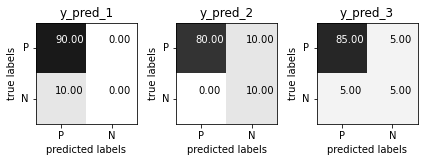

In [22]:
fig, axes = plt.subplots(1, 3)
for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):
    plot_confusion_matrix(confusion_matrix(y_true, y_pred), cmap='gray_r', ax=ax,
                          xticklabels=["P", "N"], yticklabels=["P", "N"], xtickrotation=0, vmin=0, vmax=100)
    ax.set_title("y_pred_{}".format(i + 1))

plt.tight_layout()

 # detail report using classification_report

In [23]:
from sklearn.metrics import classification_report
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        90
           1       0.50      1.00      0.67        10

    accuracy                           0.90       100
   macro avg       0.75      0.94      0.80       100
weighted avg       0.95      0.90      0.91       100

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        90
           1       0.50      0.50      0.50        10

    accuracy                           0.90       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.90      0.90      0.90       100



C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Changing Threshold of our acuracy

# using the breast cancer dataset

In [24]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.94      0.94      0.94        90

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
# if our threshold is > 85 to be considered as 1

In [26]:
y_pred = lr.predict_proba(X_test)[:, 1] > .85

print('Threshold for > 0.85 then 1')
print(classification_report(y_test, y_pred))

Threshold for > 0.85 then 1
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        53
           1       1.00      0.89      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143

